# COMPARISON OF HEIGHTS BETWEEN FAMILY MEMBERS

In this analysis, we use a dataset of 163 families which consists of the columns:
\
**FAMILY S.NO.** | **MEMBER** | **AGE** | **HEIGHT**

In [1]:
def ft2cmstr(k):
    if "'" in k:
        p=k.strip().split("'")
    return str(30.48*int(p[0])+2.54*int(p[1]))
ft2cmstr("5'5")

'165.1'

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('/home/zeborg/KRMU/SEM-3/USING DATA IN EVERYDAY LIFE/Height_Data_Merged.xlsx')
df.drop(columns=['Unnamed: 4','Unnamed: 5'], inplace=True)
df['MEMBER']=df['MEMBER'].str.upper()
df

,FAMILY,MEMBER,AGE,HEIGHT
0,1,FATHER,55,"5'8"""
1,1,MOTHER,50,5'
2,1,SON,21,"5'6"""
3,1,DAUGHTER,23,"5'4"""
4,2,FATHER,60,"5'9"""
...,...,...,...,...
688,162,DAUGHTER,30,5’6’
689,163,FATHER,58,5’7
690,163,MOTHER,54,5’5
691,163,SON,19,5’8


In [4]:
df['MEMBER']=df['MEMBER'].apply(lambda x:x.strip())
df['HEIGHT']=df['HEIGHT'].astype(str)
df['HEIGHT']=df['HEIGHT'].apply(lambda x:x.strip('"'))
df['HEIGHT']=df['HEIGHT'].apply(lambda x:x.strip('\n'))
df['HEIGHT']

0       5'8
1        5'
2       5'6
3       5'4
4       5'9
       ... 
688    5’6’
689     5’7
690     5’5
691     5’8
692     5’4
Name: HEIGHT, Length: 693, dtype: object

In [5]:
family=dict()
for i in range(1,df['FAMILY'].max()+1):
    k = df[df['FAMILY']==i]
    family[i] = ((k['HEIGHT'].max(),k[k['HEIGHT']==k['HEIGHT'].max()]['MEMBER'].to_list()))
count=dict()
for i in range(1,df['FAMILY'].max()+1):
    count[family[i][1][0]] = count.get(family[i][1][0],0)+1
for key,value in count.items():
    print(key,':',value)

FATHER : 77
SON : 69
MOTHER : 4
DAUGHTER : 13


In [6]:
pd.DataFrame.from_dict(count, orient='index').transpose().reindex(columns=['FATHER','SON','DAUGHTER','MOTHER'])

,FATHER,SON,DAUGHTER,MOTHER
0,77,69,13,4


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df['FAMILY'].max()

163

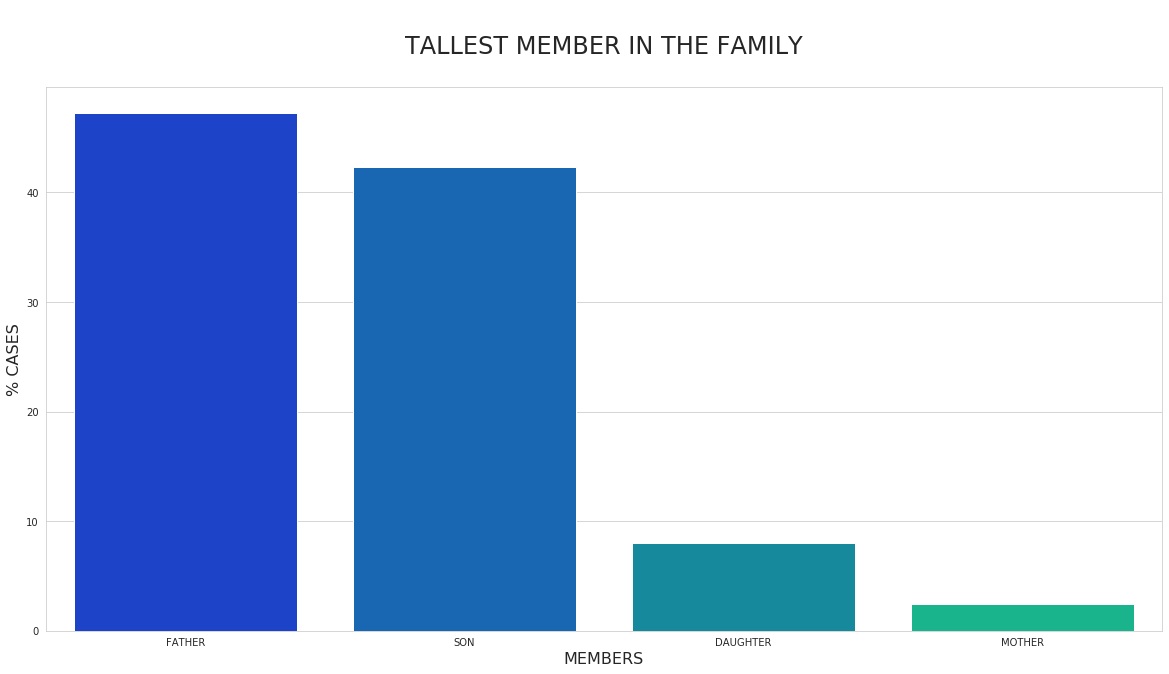

In [9]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.barplot(data=(pd.DataFrame.from_dict(count, orient='index').transpose().reindex(columns=['FATHER','SON','DAUGHTER','MOTHER'])/df['FAMILY'].max())*100, palette='winter')
plt.title('\nTALLEST MEMBER IN THE FAMILY\n',fontsize=24)
plt.xlabel('MEMBERS',fontsize=16)
plt.ylabel('% CASES',fontsize=16)
plt.show()

In [10]:
df.set_index(['FAMILY','MEMBER'],inplace=True)

In [11]:
df

AGE HEIGHT
FAMILY MEMBER              
1      FATHER     55    5'8
       MOTHER     50     5'
       SON        21    5'6
       DAUGHTER   23    5'4
2      FATHER     60    5'9
...              ...    ...
162    DAUGHTER   30   5’6’
163    FATHER     58    5’7
       MOTHER     54    5’5
       SON        19    5’8
       DAUGHTER   22    5’4

[693 rows x 2 columns]

In [12]:
df.sort_index(level=0,inplace=True)
k,m=dict(),list()

for i in range(1,df.index.max()[0]+1):
    l=list()
    for index, row in df.loc[i].T.iterrows():
        l.append([index,row.index.to_list(),row.values])
    k[i]=l

# k = dictionary of values [ ['AGE', member_list, age_array] , ['HEIGHT', member_list, height_array] ], where key is family_no

for i in range(1,df.index.max()[0]+1):
    tmp=list()
    for j in range(len(k[i][0][1])):
        tmp.append((i,k[i][0][1][j],k[i][0][2][j],str(k[i][1][2][j])))
    m.append(tmp)
    
# m[index] = list of ( family_no, member, age, height )

oldest_list,youngest_list=list(),list()

for i in range(df.index.max()[0]):
    oldest,youngest = (None, None, 0, None),(None, None, 200, None)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]>oldest[2]:
            oldest=j
    oldest_list.append(oldest)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]<youngest[2]:
            youngest=j
    youngest_list.append(youngest)

print(oldest_list)
print()
print(youngest_list)

[(1, 'DAUGHTER', 23, "5'4"), (2, 'DAUGHTER', 31, "5'5"), (3, 'SON', 30, "5'5"), (4, 'SON', 23, "5'7"), (5, 'SON', 31, "5'2"), (6, 'SON', 25, "5'7"), (7, 'DAUGHTER', 37, "5'3"), (8, 'SON', 19, "5'11"), (9, 'DAUGHTER', 19, "5'3"), (10, 'DAUGHTER', 19, "5'2"), (11, 'DAUGHTER', 22, "5'3"), (12, 'SON', 28, "5'5"), (13, 'SON', 24, "6'"), (14, 'DAUGHTER', 18, "5'4"), (15, 'SON', 32, "5'11"), (16, 'DAUGHTER', 27, "5'1"), (17, 'DAUGHTER', 21, "5'2"), (18, 'DAUGHTER', 21, "5'"), (19, 'DAUGHTER', 26, "4'9"), (20, 'SON', 27, "5'99"), (21, 'SON', 42, "6'2"), (22, 'SON', 22, "5'7"), (23, 'DAUGHTER', 23, "5'4"), (24, 'DAUGHTER', 35, "5'2"), (25, 'DAUGHTER', 20, "5'4"), (26, 'DAUGHTER', 30, "5'5"), (27, 'DAUGHTER', 32, "5'2"), (28, 'SON', 26, "5'6"), (29, 'SON', 35, "5'8"), (30, 'SON', 33, "5'8"), (31, 'SON', 32, "6'1"), (32, 'SON', 22, "6'2"), (33, 'SON', 25, "6'1"), (34, 'DAUGHTER', 20, "5'2"), (35, 'DAUGHTER', 20, "5'7"), (36, 'SON', 23, "5'6"), (37, 'SON', 29, "5'8"), (38, 'DAUGHTER', 31, "5'3"), 

In [13]:
tall_dict_father = dict()
tall_dict_father['FATHER'],tall_dict_father['OLDEST CHILD'],tall_dict_father['YOUNGEST CHILD']=0,0,0

for i in range(df.index.max()[0]):
    if df.loc[i+1,'FATHER'].HEIGHT.values[0] < oldest_list[i][3]:
        if oldest_list[i][3] < youngest_list[i][3]:
            tall_dict_father['YOUNGEST CHILD'] += 1
        else:
            tall_dict_father['OLDEST CHILD'] += 1
    else:
        tall_dict_father['FATHER'] += 1
td_f_df = (pd.DataFrame.from_dict(tall_dict_father, orient='index').rename(columns={0:'TALLEST'})/df.index.max()[0])*100

td_f_df

,TALLEST
FATHER,69.938650
OLDEST CHILD,23.312883
YOUNGEST CHILD,6.748466


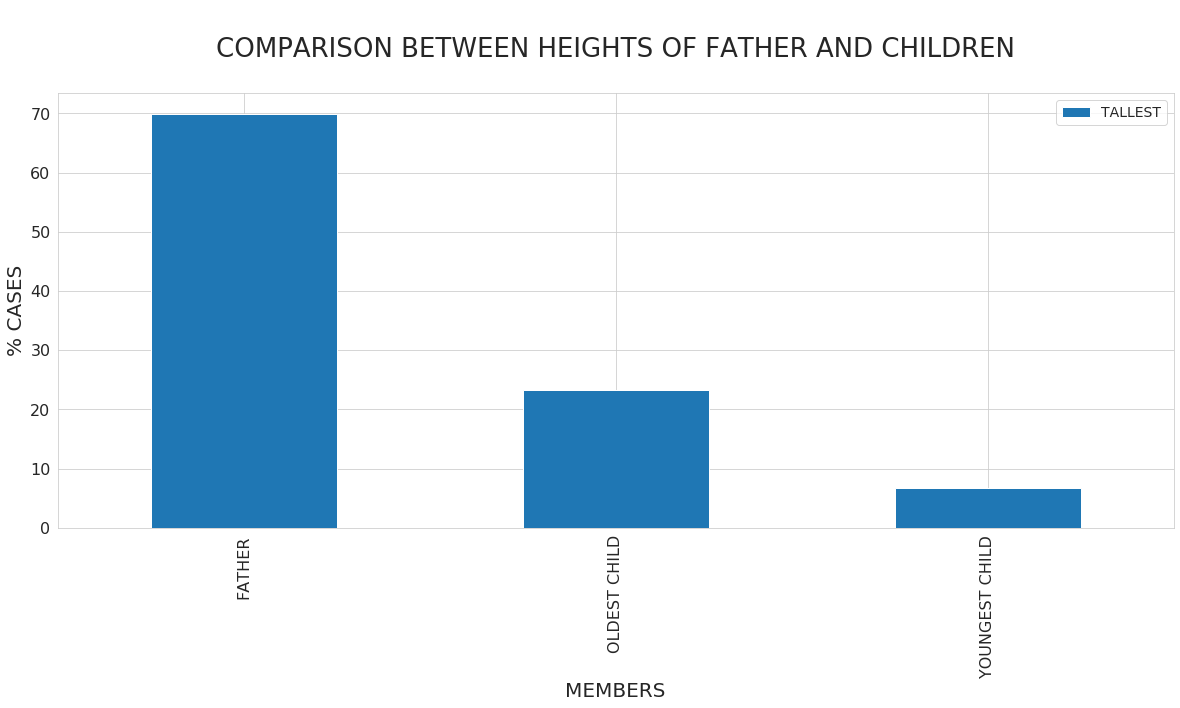

In [14]:
td_f_df.plot(kind='bar',figsize=(20,8))
plt.xlabel('MEMBERS',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER AND CHILDREN\n',fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [15]:
tall_dict_mother = dict()
tall_dict_mother['MOTHER'],tall_dict_mother['OLDEST CHILD'],tall_dict_mother['YOUNGEST CHILD']=0,0,0

for i in range(df.index.max()[0]):
    if df.loc[i+1,'MOTHER'].HEIGHT.values[0] < oldest_list[i][3]:
        if oldest_list[i][3] < youngest_list[i][3]:
            tall_dict_mother['YOUNGEST CHILD'] += 1
        else:
            tall_dict_mother['OLDEST CHILD'] += 1
    else:
        tall_dict_mother['MOTHER'] += 1
td_m_df = (pd.DataFrame.from_dict(tall_dict_mother, orient='index').rename(columns={0:'TALLEST'})/df.index.max()[0])*100

td_m_df

,TALLEST
MOTHER,29.447853
OLDEST CHILD,39.877301
YOUNGEST CHILD,30.674847


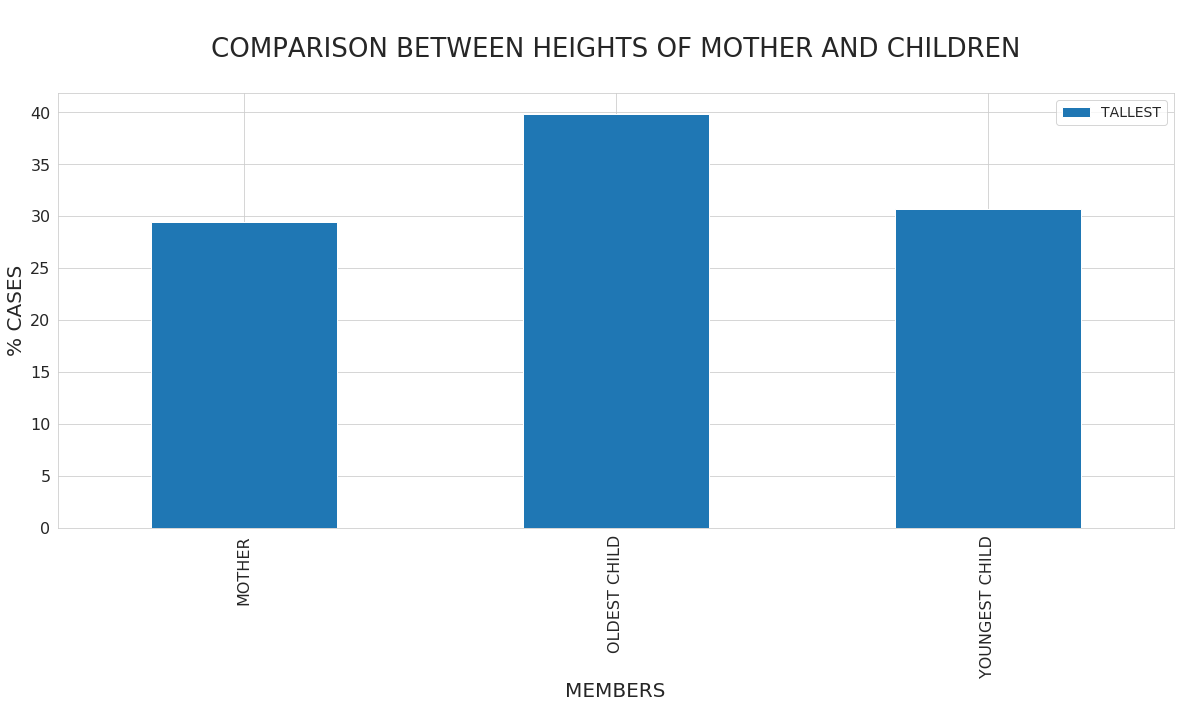

In [16]:
td_m_df.plot(kind='bar',figsize=(20,8))
plt.xlabel('MEMBERS',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER AND CHILDREN\n',fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [17]:
tall_dict_children = dict()
tall_dict_children['OLDEST CHILD'],tall_dict_children['YOUNGEST CHILD']=0,0

for i in range(df.index.max()[0]):
    if oldest_list[i][3] < youngest_list[i][3]:
        tall_dict_children['YOUNGEST CHILD'] += 1
    else:
        tall_dict_children['OLDEST CHILD'] += 1
td_c_df = (pd.DataFrame.from_dict(tall_dict_children, orient='index').rename(columns={0:'TALLEST'})/df.index.max()[0])*100

td_c_df

,TALLEST
OLDEST CHILD,56.441718
YOUNGEST CHILD,43.558282


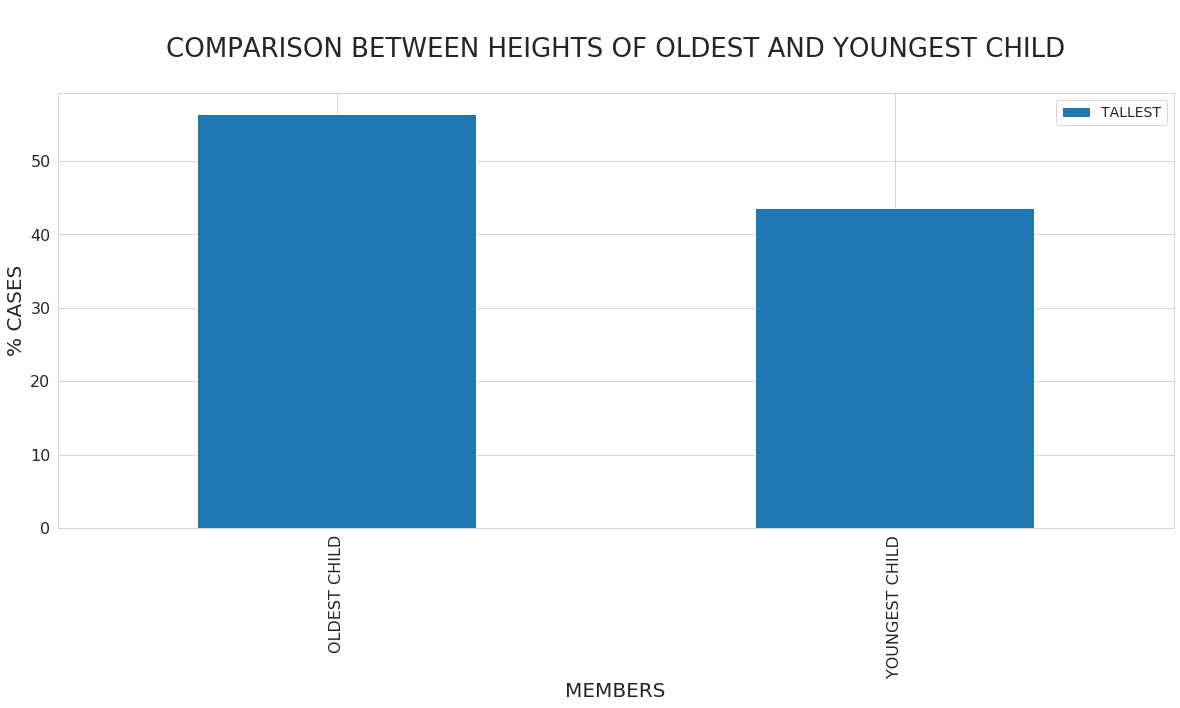

In [18]:
td_c_df.plot(kind='bar',figsize=(20,8))
plt.xlabel('MEMBERS',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF OLDEST AND YOUNGEST CHILD\n',fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
tall_dict_parents = dict()
tall_dict_parents['MOTHER'],tall_dict_parents['FATHER']=0,0

for i in range(df.index.max()[0]):
    if df.loc[i+1,'MOTHER'].HEIGHT.values[0] < df.loc[i+1,'FATHER'].HEIGHT.values[0]:
        tall_dict_parents['FATHER'] += 1
    else:
        tall_dict_parents['MOTHER'] += 1
td_p_df = (pd.DataFrame.from_dict(tall_dict_parents, orient='index').rename(columns={0:'TALLEST'})/df.index.max()[0])*100

td_p_df

In [ ]:
td_p_df.plot(kind='bar',figsize=(20,8))
plt.xlabel('MEMBERS',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER AND FATHER\n',fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()